# Data Cleaning/EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations
import scipy.stats as stats
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In two of the categories that had missing data, I used the median to fill in the NaN values. For the yr_renovated column, since the median was 0, I used the most frequent year in the data:

In [6]:
df.view = df.view.fillna(value=df.view.median())

In [7]:
df.waterfront = df.waterfront.fillna(value=df.waterfront.median())

In [8]:
df.yr_renovated = df.yr_renovated.fillna(2014)

In [9]:
df = df[df.sqft_basement != '?']

In [10]:
df['sqft_basement'] = df['sqft_basement'].astype('float')

<ipython-input-10-71d394e26864>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sqft_basement'] = df['sqft_basement'].astype('float')


In [11]:
df['sqft_basement'].unique()

array([   0.,  400.,  910., 1530.,  730., 1700.,  300.,  970.,  760.,
        720.,  700.,  820.,  780.,  790.,  330., 1620.,  360.,  588.,
       1510.,  410.,  990.,  600.,  560.,  550., 1000., 1600.,  500.,
       1040.,  880., 1010.,  240.,  265.,  290.,  800.,  540.,  710.,
        840.,  380.,  770.,  480.,  570., 1490.,  620., 1250., 1270.,
        120.,  650.,  180., 1130.,  450., 1640., 1460., 1020., 1030.,
        750.,  640., 1070.,  490., 1310.,  630., 2000.,  390.,  430.,
        850.,  210., 1430., 1950.,  440.,  220., 1160.,  860.,  580.,
       2060., 1820., 1180.,  200., 1150., 1200.,  680.,  530., 1450.,
       1170., 1080.,  960.,  280.,  870., 1100.,  460., 1400.,  660.,
       1220.,  900.,  420., 1580., 1380.,  475.,  690.,  270.,  350.,
        935., 1370.,  980., 1470.,  160.,  950.,   50.,  740., 1780.,
       1900.,  340.,  470.,  370.,  140., 1760.,  130.,  520.,  890.,
       1110.,  150., 1720.,  810.,  190., 1290.,  670., 1800., 1120.,
       1810.,   60.,

In [12]:
df['price'] = df['price'].astype('int64')

<ipython-input-12-2557eed608a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype('int64')


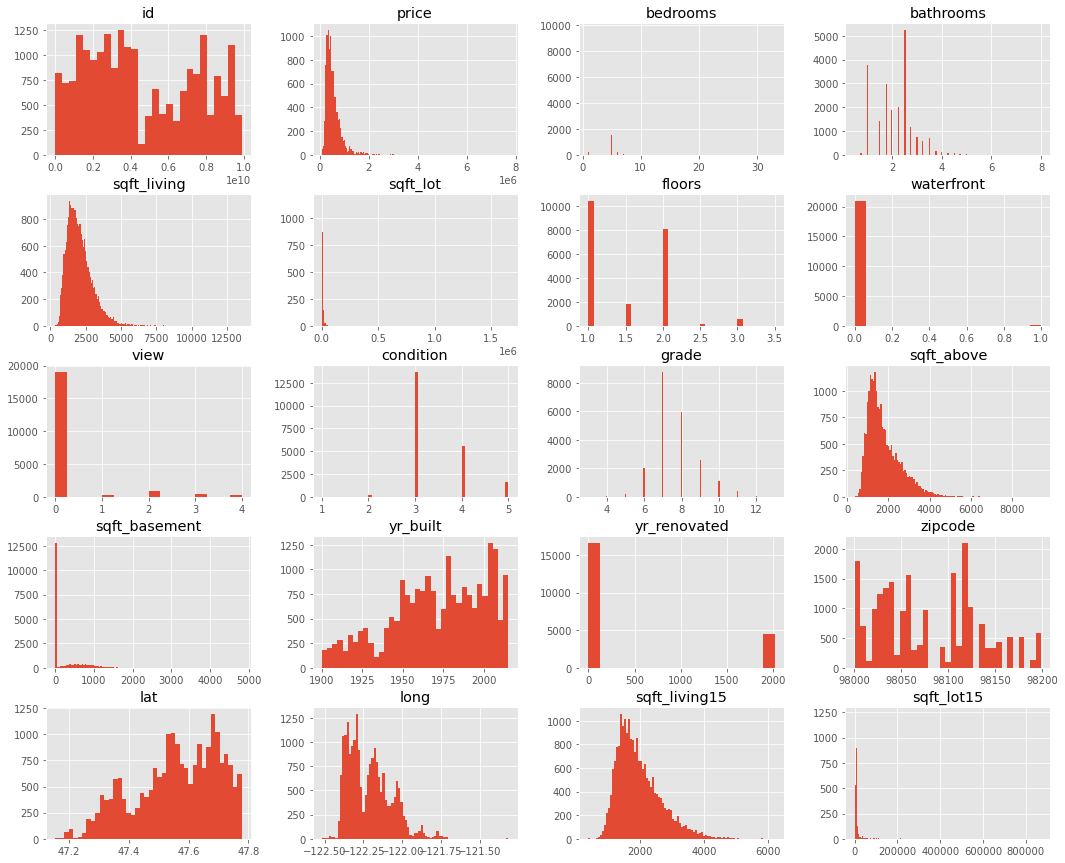

In [13]:
 df.hist(figsize=(18,15), bins='auto');

## Ordinary Least Squares Model

In [14]:
df = df.drop(['id', 'date'],axis=1)

In [15]:
X = df.drop('price', axis=1)
Y = df[['price']]
Y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [16]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,2014.0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Model 1: 

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
print(len(X_train), len(X_test), len(Y_train), len(Y_test))

16914 4229 16914 4229


In [19]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

Y_hat_train = linreg.predict(X_train)
Y_hat_test = linreg.predict(X_test)

In [20]:
train_residuals = Y_hat_train - Y_train
test_residuals = Y_hat_test - Y_test

In [21]:
train_mse = mean_squared_error(Y_train, Y_hat_train)
test_mse = mean_squared_error(Y_test, Y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)
print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train Mean Squared Error: 41037057146.92651
Test Mean Squared Error: 39253929860.067154
Train RMSE:  202576.05274791617
Test RMSE:  198126.04538542416


In [22]:
'price' + '~' + '+'.join(X.columns)

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15'

In [23]:
f = 'price' + '~' + '+'.join(X.columns)

In [24]:
model = ols(formula=f, data=df).fit()

In [25]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2899.
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:30:06   Log-Likelihood:            -2.8824e+05
No. Observations:               21143   AIC:                         5.765e+05
Df Residuals:                   21125   BIC:                         5.767e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       7.81e+06   2.96e+06      2.636      0.008       2e+06    1.36e+07
bedrooms       -3.62e+04   1926.330    -18.793      0.000      -4e+04   -3.24e+04
bathrooms      4.325e+04   3285.708     13.164      0.000    3.68e+04    4.97e+04
sqft_living     110.6012      2.305     47.988      0.000     106.084     115.119
sqft_lot          0.1138      0.049      2.324      0.020       0.018       0.210
floors         7996.3253   3649.049      2.191      0.028     843.911    1.51e+04
waterfront     6.292e+05   1.84e+04     34.196      0.000    5.93e+05    6.65e+05
view           5.412e+04   2149.480     25.180      0.000    4.99e+04    5.83e+04
condition      2.523e+04   2353.227     10.720      0.000    2.06e+04    2.98e+04
grade          9.701e+04   2185.455     44.387      0.000    9.27e+04    1.01e+05
sqft_above       70.3563      2.280     30.859      0.000      65.887      74.825
sqft_basement    40.2503      2.683     15.004      0.000      34.992      45.509
yr_built      -2742.1547     70.465    -38.915      0.000   -2880.271   -2604.039
yr_renovated      4.1103      1.706      2.409      0.016       0.766       7.455
zipcode        -590.4422     33.404    -17.676      0.000    -655.917    -524.968
lat            5.981e+05   1.09e+04     55.045      0.000    5.77e+05    6.19e+05
long          -2.157e+05   1.33e+04    -16.188      0.000   -2.42e+05    -1.9e+05
sqft_living15    21.3448      3.486      6.122      0.000      14.511      28.179
sqft_lot15       -0.3756      0.075     -5.019      0.000      -0.522      -0.229
==============================================================================
Omnibus:                    17967.838   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1812690.746
Skew:                           3.563   Prob(JB):                         0.00
Kurtosis:                      47.798   Cond. No.                     2.79e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.76e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

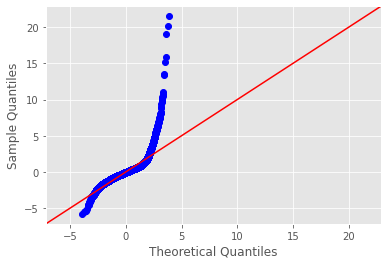

In [27]:
resid1 = model.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)

(array([2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 4.000e+00, 2.000e+00,
        3.000e+00, 4.000e+00, 1.000e+01, 1.600e+01, 1.500e+01, 2.300e+01,
        4.700e+01, 8.900e+01, 1.480e+02, 3.580e+02, 6.200e+02, 1.108e+03,
        1.781e+03, 2.578e+03, 3.424e+03, 3.476e+03, 2.935e+03, 1.937e+03,
        1.046e+03, 4.730e+02, 2.740e+02, 1.790e+02, 8.900e+01, 9.400e+01,
        6.100e+01, 4.100e+01, 4.500e+01, 4.300e+01, 3.400e+01, 2.800e+01,
        1.700e+01, 1.700e+01, 1.900e+01, 8.000e+00, 1.000e+01, 1.000e+01,
        1.300e+01, 9.000e+00, 5.000e+00, 5.000e+00, 6.000e+00, 5.000e+00,
        4.000e+00, 2.000e+00, 5.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+0

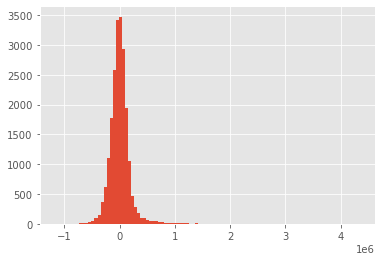

In [28]:
plt.hist(model.resid, bins=100)

On the x axis we have the actual price, and on the y-axis we have the residual:
after 2-3 million dollars, we have low predictive power, consistently underpredicting house prices.

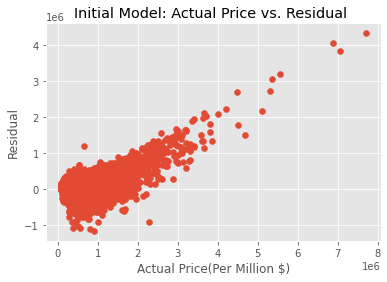

In [29]:
plt.scatter(Y, model.resid)
plt.title('Initial Model: Actual Price vs. Residual ')
plt.xlabel('Actual Price(Per Million $)')
plt.ylabel('Residual')
plt.show()

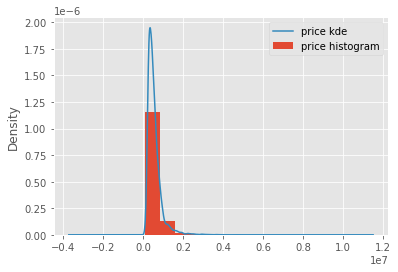

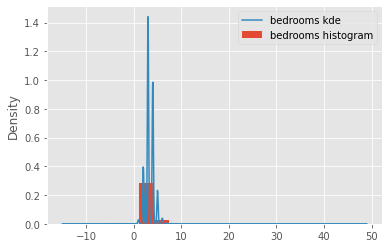

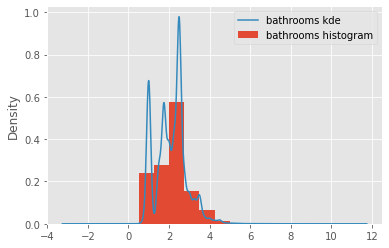

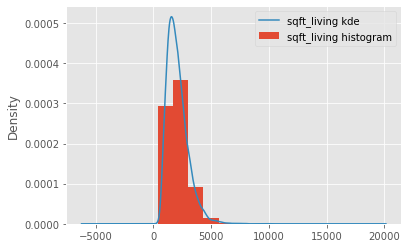

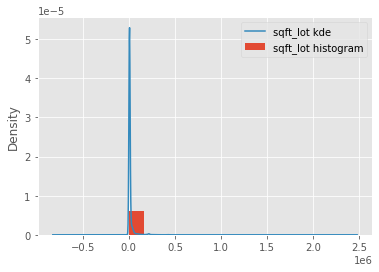

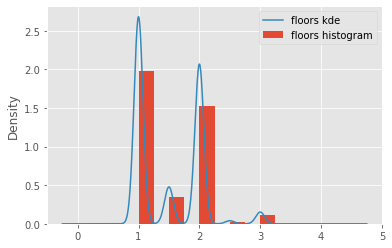

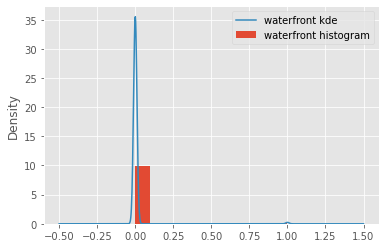

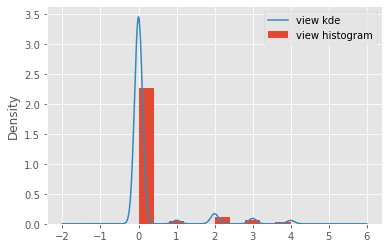

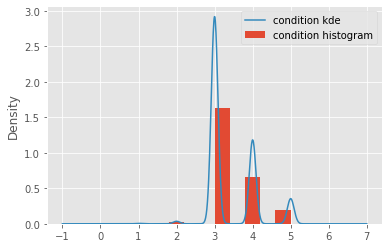

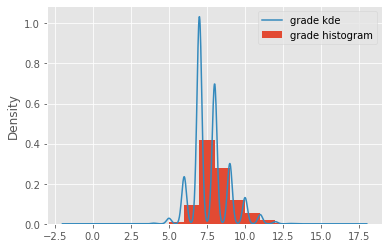

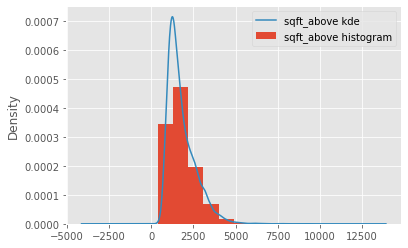

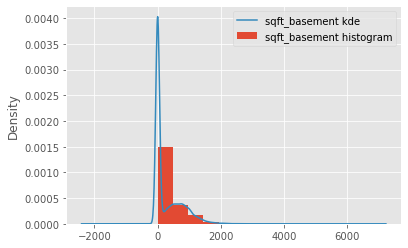

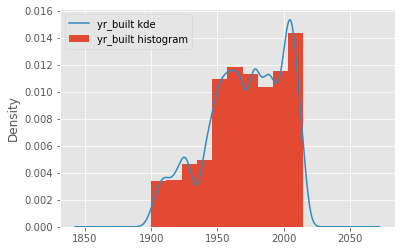

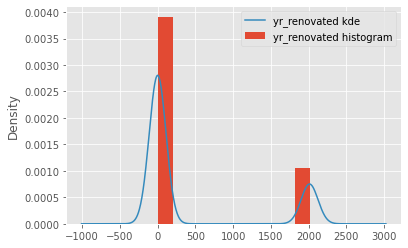

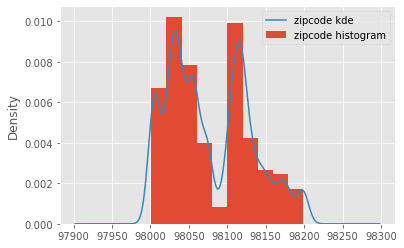

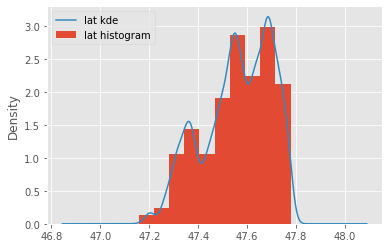

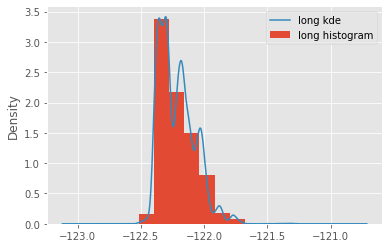

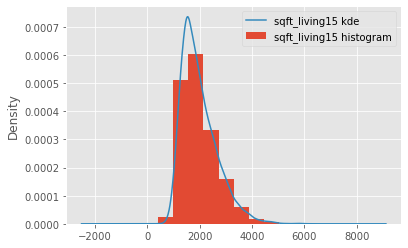

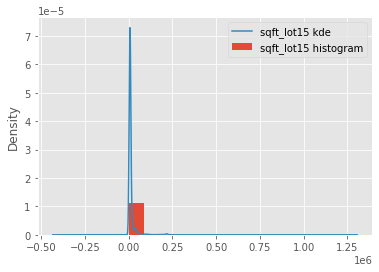

In [30]:
for column in df:
    df[column].plot.hist(density=True, label = column+' histogram')
    df[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

# Train-Test-Split

## Model 2: Removing Outliers
In this part, I focused on identifying and removing outliers using Z-Score. From that, I used the new DataFrame without outliers to conduct another statsmodel: 

In [31]:
df_no_outliers = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df_no_outliers

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,2014.0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,400000,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,402101,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,400000,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [32]:
x = df_no_outliers.drop('price', axis=1)
y = df_no_outliers[['price']]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [33]:
df_no_outliers.shape

(19023, 19)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

15218 3805 15218 3805


In [36]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)

In [37]:
second_train_residuals = y_hat_train - y_train
second_test_residuals = y_hat_test - y_test

In [38]:
second_train_mse = mean_squared_error(y_train, y_hat_train)
second_test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', second_train_mse)
print('Test Mean Squared Error:', second_test_mse)
print("Train RMSE: ", second_train_mse**0.5)
print("Test RMSE: ", second_test_mse**0.5)

Train Mean Squared Error: 17569949589.706013
Test Mean Squared Error: 18426609397.332294
Train RMSE:  132551.68648382416
Test RMSE:  135744.64776679888


In [39]:
'price' + '~' + '+'.join(x.columns)

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15'

In [40]:
f2 = 'price' + '~' + '+'.join(x.columns)

In [41]:
model2 = ols(formula=f2, data=df_no_outliers).fit()

In [42]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     2517.
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:30:23   Log-Likelihood:            -2.5145e+05
No. Observations:               19023   AIC:                         5.029e+05
Df Residuals:                   19006   BIC:                         5.031e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.702e+05   2.09e+06     -0.177      0.859   -4.46e+06    3.72e+06
bedrooms      -1.501e+04   1486.368    -10.097      0.000   -1.79e+04   -1.21e+04
bathrooms      3.043e+04   2429.125     12.528      0.000    2.57e+04    3.52e+04
sqft_living      64.2421      1.859     34.557      0.000      60.598      67.886
sqft_lot          0.2504      0.146      1.717      0.086      -0.035       0.536
floors         2.944e+04   2643.265     11.136      0.000    2.43e+04    3.46e+04
waterfront    -2.266e-06   1.28e-05     -0.177      0.859   -2.73e-05    2.28e-05
view           4.029e+04   2471.776     16.299      0.000    3.54e+04    4.51e+04
condition      2.682e+04   1664.715     16.109      0.000    2.36e+04    3.01e+04
grade          8.694e+04   1594.057     54.543      0.000    8.38e+04    9.01e+04
sqft_above       34.1784      1.788     19.117      0.000      30.674      37.683
sqft_basement    30.0629      2.087     14.406      0.000      25.972      34.153
yr_built      -2255.4816     50.129    -44.993      0.000   -2353.739   -2157.224
yr_renovated      3.4944      1.193      2.929      0.003       1.156       5.833
zipcode        -358.3837     23.546    -15.220      0.000    -404.536    -312.231
lat            5.666e+05   7520.544     75.346      0.000    5.52e+05    5.81e+05
long          -1.017e+05   1.06e+04     -9.629      0.000   -1.22e+05    -8.1e+04
sqft_living15    44.4589      2.739     16.232      0.000      39.090      49.827
sqft_lot15       -1.3010      0.190     -6.833      0.000      -1.674      -0.928
==============================================================================
Omnibus:                     5060.038   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21916.657
Skew:                           1.246   Prob(JB):                         0.00
Kurtosis:                       7.631   Cond. No.                     9.67e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  2e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

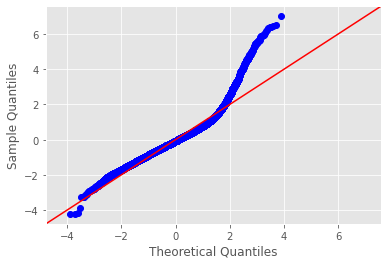

In [43]:
resid2 = model2.resid
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)

(array([3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 6.000e+00,
        9.000e+00, 8.000e+00, 1.200e+01, 1.900e+01, 1.400e+01, 2.300e+01,
        3.500e+01, 5.400e+01, 8.900e+01, 1.140e+02, 1.390e+02, 1.730e+02,
        2.320e+02, 3.050e+02, 3.600e+02, 4.450e+02, 5.060e+02, 5.890e+02,
        6.660e+02, 7.360e+02, 8.980e+02, 1.023e+03, 1.008e+03, 1.091e+03,
        1.100e+03, 1.061e+03, 1.044e+03, 9.490e+02, 8.930e+02, 8.370e+02,
        7.340e+02, 6.180e+02, 5.140e+02, 4.580e+02, 3.070e+02, 3.080e+02,
        2.060e+02, 1.790e+02, 1.480e+02, 1.230e+02, 9.900e+01, 8.800e+01,
        9.100e+01, 6.500e+01, 5.800e+01, 5.100e+01, 3.800e+01, 5.200e+01,
        3.600e+01, 4.100e+01, 1.800e+01, 3.500e+01, 2.700e+01, 3.200e+01,
        2.600e+01, 2.300e+01, 1.300e+01, 1.000e+01, 1.100e+01, 1.200e+01,
        2.100e+01, 1.200e+01, 1.100e+01, 8.000e+00, 1.000e+01, 8.000e+00,
        1.400e+01, 7.000e+00, 9.000e+0

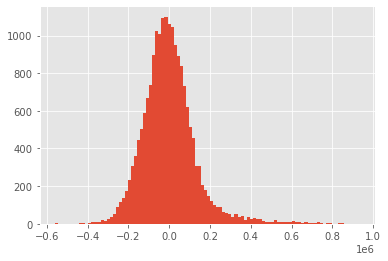

In [44]:
plt.hist(model2.resid, bins=100)

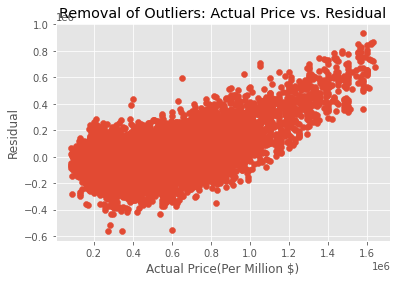

In [45]:
plt.scatter(df_no_outliers['price'], model2.resid)
plt.title('Removal of Outliers: Actual Price vs. Residual')
plt.xlabel('Actual Price(Per Million $)')
plt.ylabel('Residual')
plt.show()

### Model 3: Dropping insignificant model features

Based on the results using the DataFrame without outliers, I dropped waterfront and sqft_lot columns since their p-values were greater than 0.05:

In [46]:
df_no_outliers = df_no_outliers.drop(['waterfront', 'sqft_lot'], axis=1)

In [47]:
x2 = df_no_outliers.drop('price', axis=1)
y2 = df_no_outliers[['price']]
y2.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [48]:
x2.head()

,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,1.0,0.0,3,6,770,0.0,1933,2014.0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [49]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [50]:
print(len(x2_train), len(x2_test), len(y2_train), len(y2_test))

15218 3805 15218 3805


In [51]:
linreg = LinearRegression()
linreg.fit(x2_train, y2_train)

y2_hat_train = linreg.predict(x2_train)
y2_hat_test = linreg.predict(x2_test)

In [52]:
third_train_residuals = y2_hat_train - y2_train
third_test_residuals = y2_hat_test - y2_test

In [53]:
third_train_mse = mean_squared_error(y2_train, y2_hat_train)
third_test_mse = mean_squared_error(y2_test, y2_hat_test)
print('Train Mean Squared Error:', third_train_mse)
print('Test Mean Squared Error:', third_test_mse)
print("Train RMSE: ", third_train_mse**0.5)
print("Test RMSE: ", third_test_mse**0.5)

Train Mean Squared Error: 17576784126.61603
Test Mean Squared Error: 18408677484.805103
Train RMSE:  132577.46462584066
Test RMSE:  135678.58152562293


In [54]:
f3 = 'price' + '~' + '+'.join(x2.columns)

In [55]:
# rerun model after dropping columns
model3 = ols(formula=f3, data=df_no_outliers).fit()

In [56]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     2684.
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:30:29   Log-Likelihood:            -2.5145e+05
No. Observations:               19023   AIC:                         5.029e+05
Df Residuals:                   19007   BIC:                         5.031e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.281e+05   2.09e+06     -0.109      0.913   -4.32e+06    3.86e+06
bedrooms      -1.504e+04   1486.331    -10.119      0.000    -1.8e+04   -1.21e+04
bathrooms      3.038e+04   2429.035     12.506      0.000    2.56e+04    3.51e+04
sqft_living      64.4362      1.856     34.723      0.000      60.799      68.074
floors         2.928e+04   2641.908     11.084      0.000    2.41e+04    3.45e+04
view           4.034e+04   2471.737     16.319      0.000    3.55e+04    4.52e+04
condition      2.677e+04   1664.578     16.083      0.000    2.35e+04       3e+04
grade          8.692e+04   1594.063     54.526      0.000    8.38e+04       9e+04
sqft_above       34.3306      1.786     19.223      0.000      30.830      37.831
sqft_basement    30.1056      2.087     14.428      0.000      26.016      34.196
yr_built      -2258.5781     50.099    -45.082      0.000   -2356.777   -2160.379
yr_renovated      3.4969      1.193      2.931      0.003       1.158       5.836
zipcode        -359.0775     23.544    -15.251      0.000    -405.226    -312.929
lat            5.664e+05   7520.097     75.325      0.000    5.52e+05    5.81e+05
long          -1.012e+05   1.06e+04     -9.587      0.000   -1.22e+05   -8.05e+04
sqft_living15    44.4147      2.739     16.216      0.000      39.046      49.783
sqft_lot15       -1.0465      0.119     -8.759      0.000      -1.281      -0.812
==============================================================================
Omnibus:                     5054.264   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21826.489
Skew:                           1.245   Prob(JB):                         0.00
Kurtosis:                       7.619   Cond. No.                     4.75e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.21e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

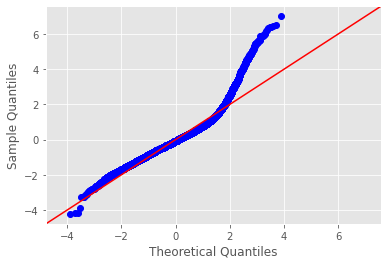

In [57]:
resid3 = model3.resid
fig = sm.graphics.qqplot(resid3, dist=stats.norm, line='45', fit=True)

(array([3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 5.000e+00,
        1.000e+01, 6.000e+00, 1.300e+01, 1.900e+01, 1.500e+01, 2.300e+01,
        3.500e+01, 4.900e+01, 9.200e+01, 1.150e+02, 1.380e+02, 1.660e+02,
        2.360e+02, 3.040e+02, 3.530e+02, 4.510e+02, 5.020e+02, 5.850e+02,
        6.680e+02, 7.350e+02, 8.860e+02, 1.023e+03, 1.003e+03, 1.089e+03,
        1.093e+03, 1.068e+03, 1.035e+03, 9.680e+02, 8.910e+02, 8.270e+02,
        7.460e+02, 6.290e+02, 5.120e+02, 4.610e+02, 3.100e+02, 3.040e+02,
        2.090e+02, 1.850e+02, 1.450e+02, 1.210e+02, 1.010e+02, 9.300e+01,
        8.700e+01, 6.800e+01, 5.700e+01, 5.400e+01, 3.800e+01, 4.800e+01,
        3.900e+01, 4.100e+01, 1.700e+01, 3.700e+01, 2.500e+01, 3.400e+01,
        2.500e+01, 2.300e+01, 1.400e+01, 9.000e+00, 1.200e+01, 1.300e+01,
        2.000e+01, 1.200e+01, 1.100e+01, 8.000e+00, 1.000e+01, 8.000e+00,
        1.400e+01, 6.000e+00, 1.000e+0

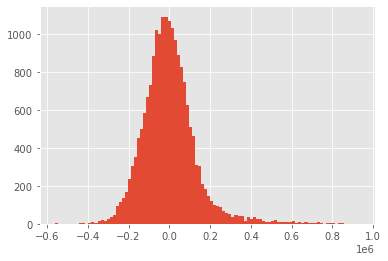

In [58]:
plt.hist(model3.resid, bins=100)

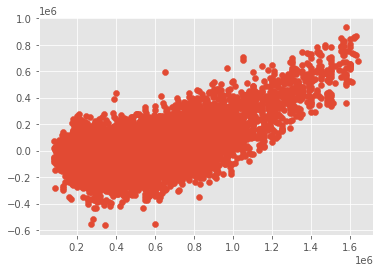

In [59]:
plt.scatter(df_no_outliers['price'], model3.resid)

# Model 4: Creating Dummy Variables

I decided to create dummy variables for sqft_basement and then rerun the model with the dummy variables:

In [60]:
df_no_outliers

,price,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,1.0,0.0,3,6,770,0.0,1933,2014.0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000,3,2.50,1530,3.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,400000,4,2.50,2310,2.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,402101,2,0.75,1020,2.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,400000,3,2.50,1600,2.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [61]:
df_no_outliers['sqft_basement'] = df_no_outliers['sqft_basement'].where(df_no_outliers['sqft_basement'] == 0, 1)
df_no_outliers

,price,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,2.0,0.0,3,7,2170,1.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,1.0,0.0,3,6,770,0.0,1933,2014.0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,1.0,0.0,5,7,1050,1.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000,3,2.50,1530,3.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,400000,4,2.50,2310,2.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,402101,2,0.75,1020,2.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,400000,3,2.50,1600,2.0,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [62]:
pd.get_dummies(df_no_outliers['sqft_basement'], drop_first=True)
df_no_outliers.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,2.0,0.0,3,7,2170,1.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,1.0,0.0,3,6,770,0.0,1933,2014.0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,1.0,0.0,5,7,1050,1.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [63]:
sqbase_dummies = pd.get_dummies(df_no_outliers['sqft_basement'], prefix='sqbase', drop_first=True)
sqbase_dummies

,sqbase_1.0
0,0
1,1
2,0
3,1
4,0
...,...
21592,0
21593,0
21594,0
21595,0


In [64]:
df_no_outliers = pd.concat([df_no_outliers, sqbase_dummies], axis=1)
df_no_outliers.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqbase_1.0
0,221900,3,1.00,1180,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,538000,3,2.25,2570,2.0,0.0,3,7,2170,1.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,180000,2,1.00,770,1.0,0.0,3,6,770,0.0,1933,2014.0,98028,47.7379,-122.233,2720,8062,0
3,604000,4,3.00,1960,1.0,0.0,5,7,1050,1.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1
4,510000,3,2.00,1680,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [65]:
df_no_outliers = df_no_outliers.drop(['sqft_basement'], axis=1)
df_no_outliers

,price,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqbase_1.0
0,221900,3,1.00,1180,1.0,0.0,3,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,538000,3,2.25,2570,2.0,0.0,3,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,180000,2,1.00,770,1.0,0.0,3,6,770,1933,2014.0,98028,47.7379,-122.233,2720,8062,0
3,604000,4,3.00,1960,1.0,0.0,5,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,1
4,510000,3,2.00,1680,1.0,0.0,3,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000,3,2.50,1530,3.0,0.0,3,8,1530,2009,0.0,98103,47.6993,-122.346,1530,1509,0
21593,400000,4,2.50,2310,2.0,0.0,3,8,2310,2014,0.0,98146,47.5107,-122.362,1830,7200,0
21594,402101,2,0.75,1020,2.0,0.0,3,7,1020,2009,0.0,98144,47.5944,-122.299,1020,2007,0
21595,400000,3,2.50,1600,2.0,0.0,3,8,1600,2004,0.0,98027,47.5345,-122.069,1410,1287,0


In [66]:
df_no_outliers = df_no_outliers.rename(columns={'sqbase_1.0': 'Basement'})
df_no_outliers

,price,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Basement
0,221900,3,1.00,1180,1.0,0.0,3,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,538000,3,2.25,2570,2.0,0.0,3,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,180000,2,1.00,770,1.0,0.0,3,6,770,1933,2014.0,98028,47.7379,-122.233,2720,8062,0
3,604000,4,3.00,1960,1.0,0.0,5,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,1
4,510000,3,2.00,1680,1.0,0.0,3,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000,3,2.50,1530,3.0,0.0,3,8,1530,2009,0.0,98103,47.6993,-122.346,1530,1509,0
21593,400000,4,2.50,2310,2.0,0.0,3,8,2310,2014,0.0,98146,47.5107,-122.362,1830,7200,0
21594,402101,2,0.75,1020,2.0,0.0,3,7,1020,2009,0.0,98144,47.5944,-122.299,1020,2007,0
21595,400000,3,2.50,1600,2.0,0.0,3,8,1600,2004,0.0,98027,47.5345,-122.069,1410,1287,0


In [67]:
x3 = df_no_outliers.drop('price', axis=1)
y3 = df_no_outliers[['price']]
y3.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [68]:
x3.head()

,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Basement
0,3,1.00,1180,1.0,0.0,3,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,3,2.25,2570,2.0,0.0,3,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,2,1.00,770,1.0,0.0,3,6,770,1933,2014.0,98028,47.7379,-122.233,2720,8062,0
3,4,3.00,1960,1.0,0.0,5,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,1
4,3,2.00,1680,1.0,0.0,3,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [69]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=42)

In [70]:
print(len(x3_train), len(x3_test), len(y3_train), len(y3_test))

15218 3805 15218 3805


In [71]:
linreg = LinearRegression()
linreg.fit(x3_train, y3_train)

y3_hat_train = linreg.predict(x3_train)
y3_hat_test = linreg.predict(x3_test)

In [72]:
fourth_train_residuals = y3_hat_train - y3_train
fourth_test_residuals = y3_hat_test - y3_test

In [73]:
fourth_train_mse = mean_squared_error(y3_train, y3_hat_train)
fourth_test_mse = mean_squared_error(y3_test, y3_hat_test)
print('Train Mean Squared Error:', fourth_train_mse)
print('Test Mean Squared Error:', fourth_test_mse)
print("Train RMSE: ", fourth_train_mse**0.5)
print("Test RMSE: ", fourth_test_mse**0.5)

Train Mean Squared Error: 17542497900.277794
Test Mean Squared Error: 18326219646.02878
Train RMSE:  132448.0951175886
Test RMSE:  135374.36849724833


In [74]:
f4 = 'price' + '~' + '+'.join(x3.columns)

In [75]:
model4 = ols(formula=f4, data=df_no_outliers).fit()

In [76]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     2526.
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:30:39   Log-Likelihood:            -2.5143e+05
No. Observations:               19023   AIC:                         5.029e+05
Df Residuals:                   19006   BIC:                         5.030e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.081e+06   2.09e+06      0.517      0.605   -3.02e+06    5.18e+06
bedrooms      -1.463e+04   1485.674     -9.849      0.000   -1.75e+04   -1.17e+04
bathrooms       2.86e+04   2439.604     11.724      0.000    2.38e+04    3.34e+04
sqft_living      67.7439      5.234     12.943      0.000      57.485      78.003
floors         2.963e+04   2639.128     11.226      0.000    2.45e+04    3.48e+04
view           4.039e+04   2468.709     16.359      0.000    3.55e+04    4.52e+04
condition      2.749e+04   1665.807     16.504      0.000    2.42e+04    3.08e+04
grade          8.597e+04   1598.039     53.795      0.000    8.28e+04    8.91e+04
sqft_above       35.2423      5.633      6.256      0.000      24.200      46.284
yr_built      -2256.5109     50.039    -45.095      0.000   -2354.591   -2158.431
yr_renovated      3.5464      1.192      2.976      0.003       1.210       5.882
zipcode        -365.0956     23.531    -15.515      0.000    -411.219    -318.973
lat            5.647e+05   7515.078     75.143      0.000     5.5e+05    5.79e+05
long          -9.592e+04   1.06e+04     -9.075      0.000   -1.17e+05   -7.52e+04
sqft_living15    43.8506      2.737     16.023      0.000      38.486      49.215
sqft_lot15       -1.0174      0.119     -8.520      0.000      -1.251      -0.783
Basement       2.763e+04   3995.464      6.915      0.000    1.98e+04    3.55e+04
==============================================================================
Omnibus:                     5119.793   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22337.643
Skew:                           1.259   Prob(JB):                         0.00
Kurtosis:                       7.674   Cond. No.                     2.14e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

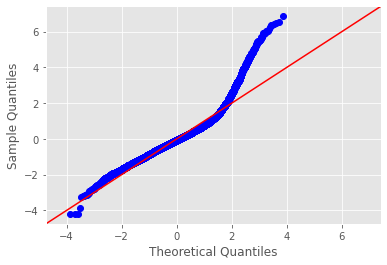

In [77]:
resid4 = model4.resid
fig = sm.graphics.qqplot(resid4, dist=stats.norm, line='45', fit=True)

(array([3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 4.000e+00, 3.000e+00, 3.000e+00,
        9.000e+00, 6.000e+00, 1.300e+01, 1.300e+01, 1.300e+01, 2.100e+01,
        3.700e+01, 4.400e+01, 9.200e+01, 1.220e+02, 1.090e+02, 1.640e+02,
        2.280e+02, 2.780e+02, 3.440e+02, 4.140e+02, 5.000e+02, 5.680e+02,
        5.690e+02, 7.440e+02, 8.410e+02, 9.240e+02, 1.018e+03, 1.070e+03,
        1.099e+03, 1.087e+03, 1.051e+03, 9.770e+02, 8.880e+02, 8.280e+02,
        7.890e+02, 6.590e+02, 5.510e+02, 4.790e+02, 3.590e+02, 3.020e+02,
        2.700e+02, 1.860e+02, 1.670e+02, 1.200e+02, 1.080e+02, 8.800e+01,
        9.800e+01, 8.300e+01, 6.800e+01, 4.100e+01, 5.100e+01, 4.500e+01,
        4.400e+01, 3.700e+01, 3.500e+01, 1.900e+01, 3.400e+01, 2.700e+01,
        2.800e+01, 2.900e+01, 2.000e+01, 1.300e+01, 1.000e+01, 1.200e+01,
        1.100e+01, 2.000e+01, 1.200e+01, 1.300e+01, 8.000e+00, 1.000e+01,
        9.000e+00, 1.000e+01, 8.000e+0

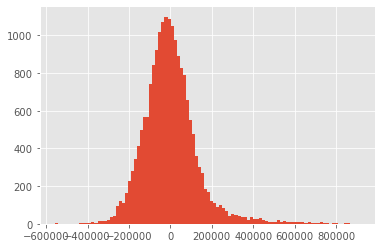

In [78]:
plt.hist(model4.resid, bins=100)

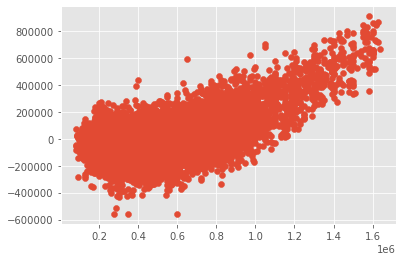

In [79]:
plt.scatter(df_no_outliers['price'], model4.resid)

# Model 5: Multicollinearity Check

At this point, I decided to do a multicollinearity check to see if I needed to drop additional features:

In [80]:
df_no_outliers.corr()

,price,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Basement
price,1.000000,0.301760,0.448940,0.621542,0.277033,0.191522,0.039140,0.632251,0.527170,0.038329,0.037001,-0.032571,0.426847,0.057398,0.542083,0.085880,0.160872
bedrooms,0.301760,1.000000,0.492129,0.607741,0.165752,0.040141,0.020068,0.332925,0.484463,0.167878,-0.009576,-0.168929,-0.037810,0.173701,0.395927,0.106434,0.140584
bathrooms,0.448940,0.492129,1.000000,0.711381,0.517288,0.072481,-0.146403,0.616455,0.630039,0.549460,-0.001192,-0.217138,0.001431,0.270213,0.527379,0.060781,0.134187
sqft_living,0.621542,0.607741,0.711381,1.000000,0.360391,0.129675,-0.076914,0.706350,0.855538,0.348033,0.003022,-0.214735,0.035278,0.301064,0.737635,0.226493,0.171190
floors,0.277033,0.165752,0.517288,0.360391,1.000000,-0.011150,-0.281064,0.472161,0.540140,0.508997,-0.007631,-0.061832,0.039121,0.144284,0.276984,-0.104732,-0.277332
view,0.191522,0.040141,0.072481,0.129675,-0.011150,1.000000,0.029337,0.108750,0.048839,-0.067526,0.016083,0.087347,0.011292,-0.079744,0.145345,0.018873,0.132731
condition,0.039140,0.020068,-0.146403,-0.076914,-0.281064,0.029337,1.000000,-0.179602,-0.180251,-0.369240,-0.027708,-0.007501,-0.014390,-0.091351,-0.113324,0.053932,0.124778
grade,0.632251,0.332925,0.616455,0.706350,0.472161,0.108750,-0.179602,1.000000,0.710321,0.479040,-0.007482,-0.191109,0.106874,0.241395,0.669421,0.150446,0.000549
sqft_above,0.527170,0.484463,0.630039,0.855538,0.540140,0.048839,-0.180251,0.710321,1.000000,0.455191,-0.005353,-0.277936,-0.024970,0.407357,0.719944,0.219649,-0.289189
yr_built,0.038329,0.167878,0.549460,0.348033,0.508997,-0.067526,-0.369240,0.479040,0.455191,1.000000,-0.085021,-0.341373,-0.156718,0.427830,0.351043,0.045953,-0.171325


In [81]:
abs(df_no_outliers.corr()) > 0.70

,price,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Basement
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,True,True,False,False,False,False,False,True,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,True,True,False,False,False,False,False,True,False,False
yr_built,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


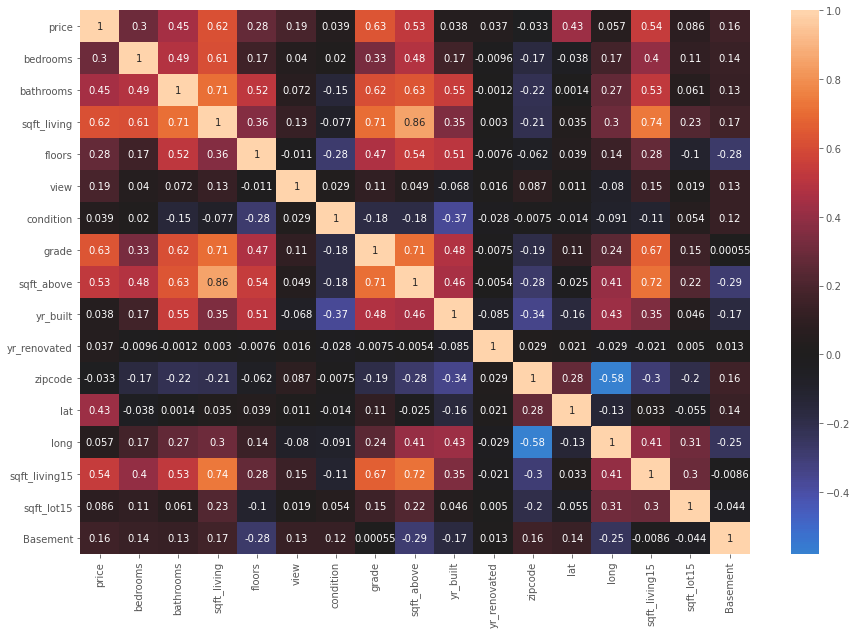

In [82]:
plt.figure(figsize=(15,10))
sns.heatmap(df_no_outliers.corr(), annot=True, center=0);

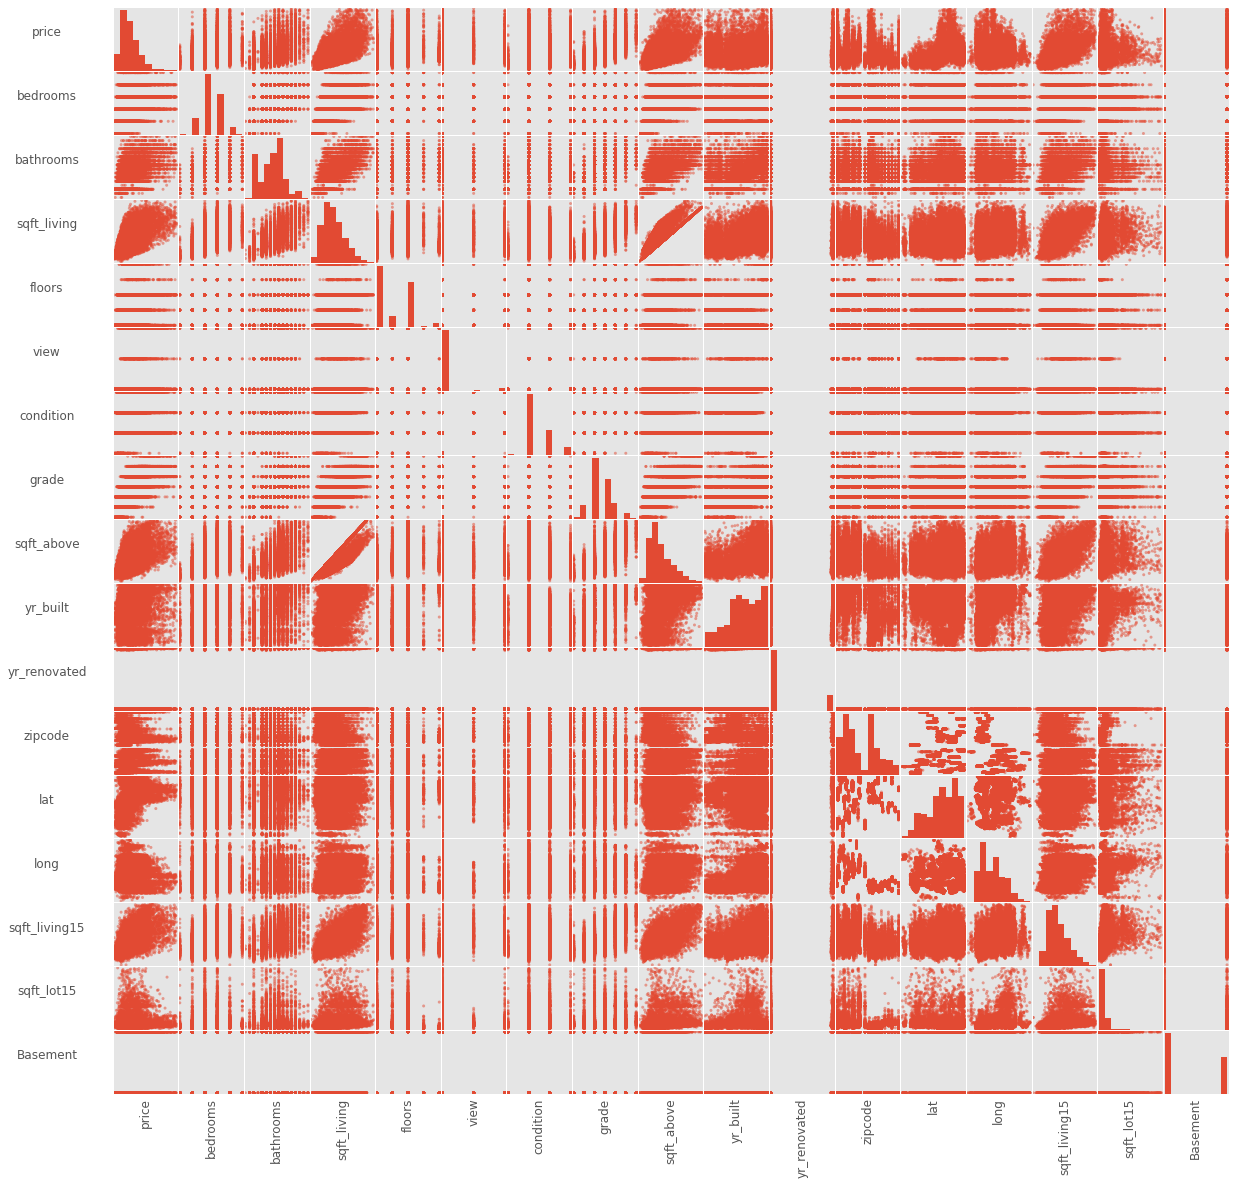

In [83]:
sm1 = pd.plotting.scatter_matrix(df_no_outliers, figsize=[20, 20]);

[s.xaxis.label.set_rotation(90) for s in sm1.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm1.reshape(-1)]

[s.get_yaxis().set_label_coords(-1,0.5) for s in sm1.reshape(-1)]

[s.set_xticks(()) for s in sm1.reshape(-1)]
[s.set_yticks(()) for s in sm1.reshape(-1)]

plt.show()

In [85]:
df_corr = df_no_outliers.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

df_corr.set_index(['pairs'], inplace = True)

df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_corr.columns = ['cc']

df_corr.drop_duplicates(inplace=True)

df_corr[(df_corr.cc>.70) & (df_corr.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.855538
"(sqft_living15, sqft_living)",0.737635
"(sqft_living15, sqft_above)",0.719944
"(bathrooms, sqft_living)",0.711381
"(sqft_above, grade)",0.710321
"(grade, sqft_living)",0.706350


Based on the results of the multicollinearity check, I decided to drop features that had high correlations with sqft_living, since sqft_living has a high coefficient correlation with price.

In [86]:
df_no_outliers.drop(columns=['sqft_above', 'sqft_living15', 'bathrooms', 'grade'], inplace=True)
df_no_outliers

,price,bedrooms,sqft_living,floors,view,condition,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,Basement
0,221900,3,1180,1.0,0.0,3,1955,0.0,98178,47.5112,-122.257,5650,0
1,538000,3,2570,2.0,0.0,3,1951,1991.0,98125,47.7210,-122.319,7639,1
2,180000,2,770,1.0,0.0,3,1933,2014.0,98028,47.7379,-122.233,8062,0
3,604000,4,1960,1.0,0.0,5,1965,0.0,98136,47.5208,-122.393,5000,1
4,510000,3,1680,1.0,0.0,3,1987,0.0,98074,47.6168,-122.045,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000,3,1530,3.0,0.0,3,2009,0.0,98103,47.6993,-122.346,1509,0
21593,400000,4,2310,2.0,0.0,3,2014,0.0,98146,47.5107,-122.362,7200,0
21594,402101,2,1020,2.0,0.0,3,2009,0.0,98144,47.5944,-122.299,2007,0
21595,400000,3,1600,2.0,0.0,3,2004,0.0,98027,47.5345,-122.069,1287,0


In [87]:
x4 = df_no_outliers.drop('price', axis=1)
y4 = df_no_outliers[['price']]
y4.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [88]:
x4.head()

,bedrooms,sqft_living,floors,view,condition,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,Basement
0,3,1180,1.0,0.0,3,1955,0.0,98178,47.5112,-122.257,5650,0
1,3,2570,2.0,0.0,3,1951,1991.0,98125,47.7210,-122.319,7639,1
2,2,770,1.0,0.0,3,1933,2014.0,98028,47.7379,-122.233,8062,0
3,4,1960,1.0,0.0,5,1965,0.0,98136,47.5208,-122.393,5000,1
4,3,1680,1.0,0.0,3,1987,0.0,98074,47.6168,-122.045,7503,0


In [89]:
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=42)

In [90]:
print(len(x4_train), len(x4_test), len(y4_train), len(y4_test))

15218 3805 15218 3805


In [91]:
linreg = LinearRegression()
linreg.fit(x4_train, y4_train)

y4_hat_train = linreg.predict(x4_train)
y4_hat_test = linreg.predict(x4_test)

In [92]:
fifth_train_residuals = y4_hat_train - y4_train
fifth_test_residuals = y4_hat_test - y4_test

In [93]:
fifth_train_mse = mean_squared_error(y4_train, y4_hat_train)
fifth_test_mse = mean_squared_error(y4_test, y4_hat_test)
print('Train Mean Squared Error:', fifth_train_mse)
print('Test Mean Squared Error:', fifth_test_mse)
print("Train RMSE: ", fifth_train_mse**0.5)
print("Test RMSE: ", fifth_test_mse**0.5)

Train Mean Squared Error: 21733532028.704975
Test Mean Squared Error: 22598913992.783546
Train RMSE:  147422.96981374704
Test RMSE:  150329.35173406271


In [94]:
f5 = 'price' + '~' + '+'.join(x4.columns)

In [95]:
model5 = ols(formula=f5, data=df_no_outliers).fit()

In [96]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     2417.
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:31:15   Log-Likelihood:            -2.5346e+05
No. Observations:               19023   AIC:                         5.069e+05
Df Residuals:                   19010   BIC:                         5.070e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.083e+06   2.29e+06      2.220      0.026    5.96e+05    9.57e+06
bedrooms     -2.569e+04   1611.249    -15.947      0.000   -2.89e+04   -2.25e+04
sqft_living    211.1900      2.193     96.287      0.000     206.891     215.489
floors         6.23e+04   2666.189     23.365      0.000    5.71e+04    6.75e+04
view          5.685e+04   2713.863     20.946      0.000    5.15e+04    6.22e+04
condition     2.507e+04   1837.122     13.645      0.000    2.15e+04    2.87e+04
yr_built     -1304.4565     50.799    -25.679      0.000   -1404.027   -1204.886
yr_renovated     4.2385      1.324      3.202      0.001       1.644       6.833
zipcode       -511.7821     26.009    -19.677      0.000    -562.762    -460.802
lat            6.57e+05   8199.277     80.131      0.000    6.41e+05    6.73e+05
long         -1.343e+05   1.15e+04    -11.660      0.000   -1.57e+05   -1.12e+05
sqft_lot15      -0.4363      0.131     -3.319      0.001      -0.694      -0.179
Basement     -1235.9780   2593.806     -0.477      0.634   -6320.069    3848.113
==============================================================================
Omnibus:                     4595.632   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17979.118
Skew:                           1.159   Prob(JB):                         0.00
Kurtosis:                       7.161   Cond. No.                     2.10e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

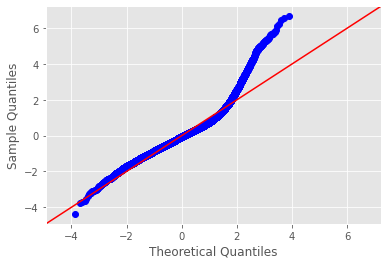

In [97]:
resid5 = model5.resid
fig = sm.graphics.qqplot(resid5, dist=stats.norm, line='45', fit=True)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 8.000e+00,
        5.000e+00, 4.000e+00, 1.000e+01, 1.000e+01, 1.300e+01, 3.200e+01,
        2.500e+01, 3.200e+01, 5.000e+01, 5.400e+01, 7.100e+01, 1.030e+02,
        1.490e+02, 1.970e+02, 2.160e+02, 2.530e+02, 3.680e+02, 4.380e+02,
        5.580e+02, 5.700e+02, 6.980e+02, 7.680e+02, 8.860e+02, 9.510e+02,
        9.300e+02, 1.033e+03, 1.044e+03, 1.096e+03, 1.074e+03, 1.042e+03,
        9.470e+02, 8.250e+02, 6.990e+02, 6.080e+02, 5.140e+02, 3.680e+02,
        3.320e+02, 2.710e+02, 2.460e+02, 1.860e+02, 1.580e+02, 1.250e+02,
        1.180e+02, 1.040e+02, 7.800e+01, 7.400e+01, 5.000e+01, 5.800e+01,
        5.400e+01, 4.600e+01, 4.400e+01, 4.800e+01, 3.300e+01, 1.700e+01,
        3.000e+01, 2.700e+01, 2.700e+01, 2.200e+01, 2.200e+01, 1.700e+01,
        1.600e+01, 1.800e+01, 1.500e+01, 1.100e+01, 1.200e+01, 1.000e+01,
        1.100e+01, 7.000e+00, 2.000e+0

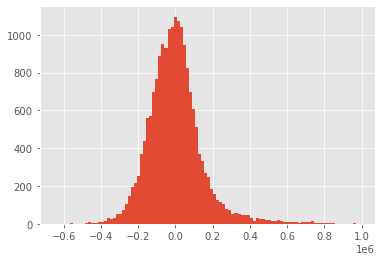

In [98]:
plt.hist(model5.resid, bins=100)

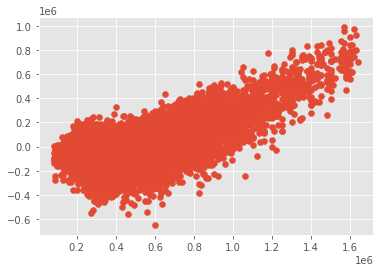

In [99]:
plt.scatter(df_no_outliers['price'], model5.resid)

# Model 6: Log Transforming Features

I dropped features that had low coefficient correlations with price. 

In [100]:
df_no_outliers.drop(columns=['zipcode', 'yr_renovated', 'long', 'lat', 'condition', 'sqft_lot15', 'view', 'yr_built', 'Basement'], inplace=True)
df_no_outliers

,price,bedrooms,sqft_living,floors
0,221900,3,1180,1.0
1,538000,3,2570,2.0
2,180000,2,770,1.0
3,604000,4,1960,1.0
4,510000,3,1680,1.0
...,...,...,...,...
21592,360000,3,1530,3.0
21593,400000,4,2310,2.0
21594,402101,2,1020,2.0
21595,400000,3,1600,2.0


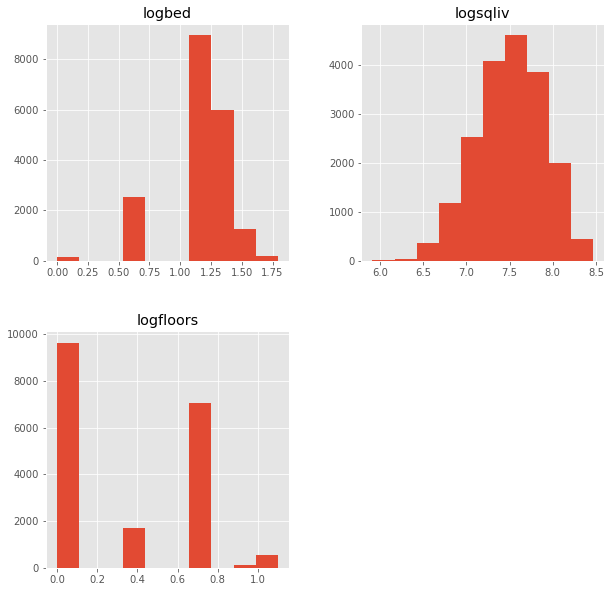

In [101]:
data_log = pd.DataFrame([])
data_log['logbed'] = np.log(df_no_outliers['bedrooms'])
data_log['logsqliv'] = np.log(df_no_outliers['sqft_living'])
data_log['logfloors'] = np.log(df_no_outliers['floors'])
data_log.hist(figsize  = [10, 10]);

In [102]:
data_log['price'] = df_no_outliers['price']
data_log.head()

,logbed,logsqliv,logfloors,price
0,1.098612,7.073270,0.000000,221900
1,1.098612,7.851661,0.693147,538000
2,0.693147,6.646391,0.000000,180000
3,1.386294,7.580700,0.000000,604000
4,1.098612,7.426549,0.000000,510000


In [103]:
x5 = data_log.drop('price', axis=1)
y5 = data_log[['price']]
y5.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [104]:
x5.head()

,logbed,logsqliv,logfloors
0,1.098612,7.073270,0.000000
1,1.098612,7.851661,0.693147
2,0.693147,6.646391,0.000000
3,1.386294,7.580700,0.000000
4,1.098612,7.426549,0.000000


In [105]:
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size=0.2, random_state=42)

In [106]:
print(len(x5_train), len(x5_test), len(y5_train), len(y5_test))

15218 3805 15218 3805


In [107]:
sc = StandardScaler()
x5_train = sc.fit_transform(x5_train)
x5_test = sc.transform(x5_test)

In [108]:
linreg = LinearRegression()
linreg.fit(x5_train, y5_train)

y5_hat_train = linreg.predict(x5_train)
y5_hat_test = linreg.predict(x5_test)

In [109]:
sixth_train_residuals = y5_hat_train - y5_train
sixth_test_residuals = y5_hat_test - y5_test

In [110]:
sixth_train_mse = mean_squared_error(y5_train, y5_hat_train)
sixth_test_mse = mean_squared_error(y5_test, y5_hat_test)
print('Train Mean Squared Error:', sixth_train_mse)
print('Test Mean Squared Error:', sixth_test_mse)
print("Train RMSE: ", sixth_train_mse**0.5)
print("Test RMSE: ", sixth_test_mse**0.5)

Train Mean Squared Error: 35392801834.25125
Test Mean Squared Error: 35461700729.96521
Train RMSE:  188129.7473401037
Test RMSE:  188312.7736771067


In [111]:
f6 = 'price' + '~' + '+'.join(x5.columns)

In [112]:
model6 = ols(formula=f6, data=data_log).fit()

In [113]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     3565.
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:31:43   Log-Likelihood:            -2.5803e+05
No. Observations:               19023   AIC:                         5.161e+05
Df Residuals:                   19019   BIC:                         5.161e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.355e+06   3.22e+04    -73.232      0.000   -2.42e+06   -2.29e+06
logbed     -1.231e+05   6558.361    -18.776      0.000   -1.36e+05    -1.1e+05
logsqliv    3.957e+05   4917.899     80.453      0.000    3.86e+05    4.05e+05
logfloors   4.502e+04   4222.697     10.662      0.000    3.67e+04    5.33e+04
==============================================================================
Omnibus:                     3603.156   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8281.256
Skew:                           1.081   Prob(JB):                         0.00
Kurtosis:                       5.403   Cond. No.                         184.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

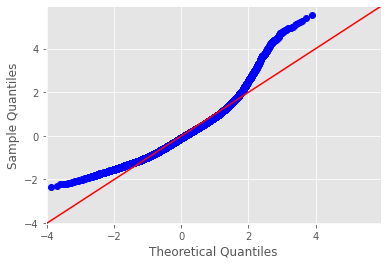

In [114]:
resid6 = model6.resid
fig = sm.graphics.qqplot(resid6, dist=stats.norm, line='45', fit=True)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 8.000e+00,
        5.000e+00, 4.000e+00, 1.000e+01, 1.000e+01, 1.300e+01, 3.200e+01,
        2.500e+01, 3.200e+01, 5.000e+01, 5.400e+01, 7.100e+01, 1.030e+02,
        1.490e+02, 1.970e+02, 2.160e+02, 2.530e+02, 3.680e+02, 4.380e+02,
        5.580e+02, 5.700e+02, 6.980e+02, 7.680e+02, 8.860e+02, 9.510e+02,
        9.300e+02, 1.033e+03, 1.044e+03, 1.096e+03, 1.074e+03, 1.042e+03,
        9.470e+02, 8.250e+02, 6.990e+02, 6.080e+02, 5.140e+02, 3.680e+02,
        3.320e+02, 2.710e+02, 2.460e+02, 1.860e+02, 1.580e+02, 1.250e+02,
        1.180e+02, 1.040e+02, 7.800e+01, 7.400e+01, 5.000e+01, 5.800e+01,
        5.400e+01, 4.600e+01, 4.400e+01, 4.800e+01, 3.300e+01, 1.700e+01,
        3.000e+01, 2.700e+01, 2.700e+01, 2.200e+01, 2.200e+01, 1.700e+01,
        1.600e+01, 1.800e+01, 1.500e+01, 1.100e+01, 1.200e+01, 1.000e+01,
        1.100e+01, 7.000e+00, 2.000e+0

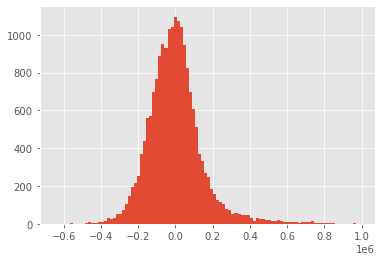

In [115]:
plt.hist(model5.resid, bins=100)

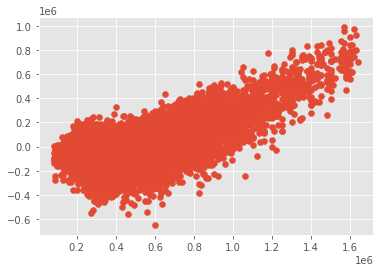

In [116]:
plt.scatter(df_no_outliers['price'], model5.resid)

# Model 7: Min-Max Scaling

## Linearity Check

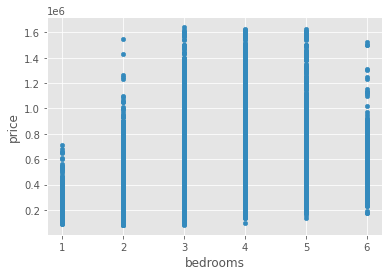

In [57]:
df.plot(kind='scatter', x='bedrooms', y='price')
plt.show()

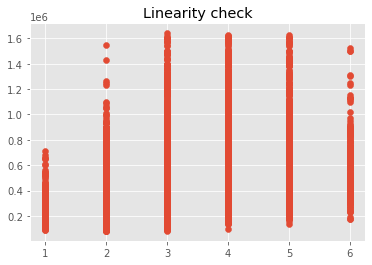

In [54]:
plt.scatter(df_no_outliers.bedrooms, df_no_outliers.price)
plt.title("Linearity check")
plt.show()

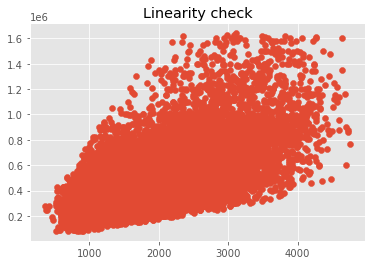

In [55]:
plt.scatter(df_no_outliers.sqft_living, df_no_outliers.price)
plt.title("Linearity check")
plt.show()

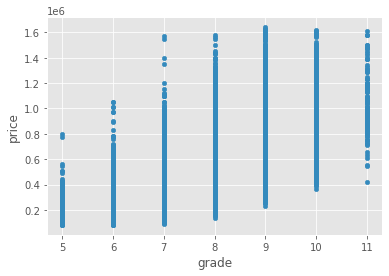

In [57]:
df_no_outliers.plot(kind='scatter', x='grade', y='price')
plt.show()

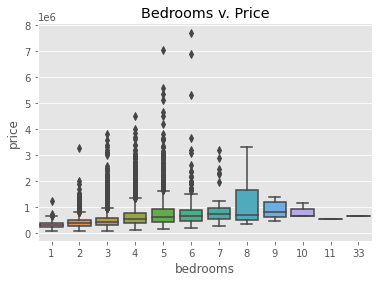

In [50]:
sns.boxplot(x='bedrooms', y='price', data=df).set(title='Bedrooms v. Price')
plt.show()

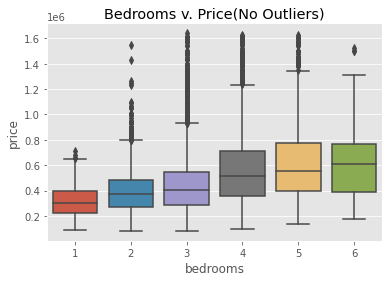

In [58]:
sns.boxplot(x='bedrooms', y='price', data=df_no_outliers).set(title='Bedrooms v. Price(N)')
plt.show()

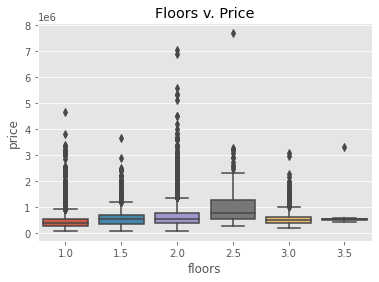

In [59]:
sns.boxplot(x='floors', y='price', data=df).set(title='Floors v. Price')
plt.show()

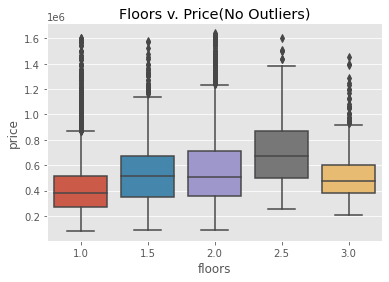

In [60]:
sns.boxplot(x='floors', y='price', data=df_no_outliers).set(title='Floors v. Price(No Outliers)')
plt.show()

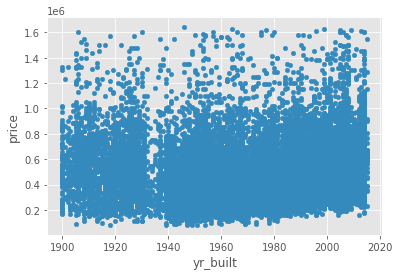

In [58]:
df.plot(kind='scatter', x='yr_built', y='price')
plt.show()

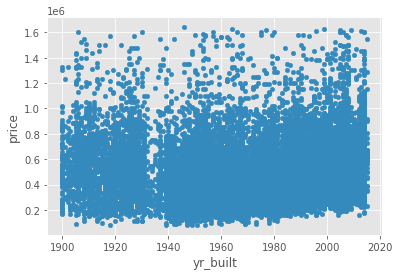

In [61]:
df_no_outliers.plot(kind='scatter', x='yr_built', y='price')
plt.show()

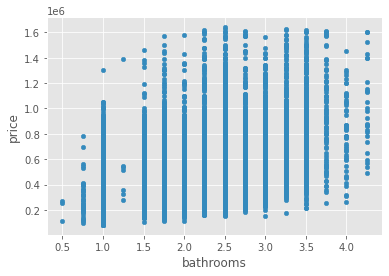

In [62]:
df_no_outliers.plot(kind='scatter', x='bathrooms', y='price')
plt.show()

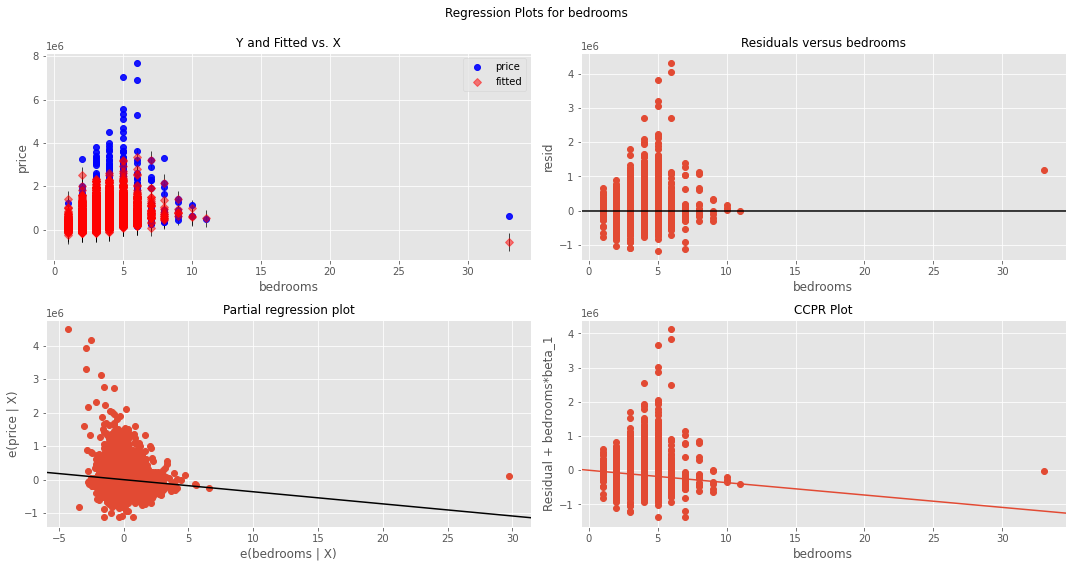

In [60]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'bedrooms', fig=fig)
plt.show()

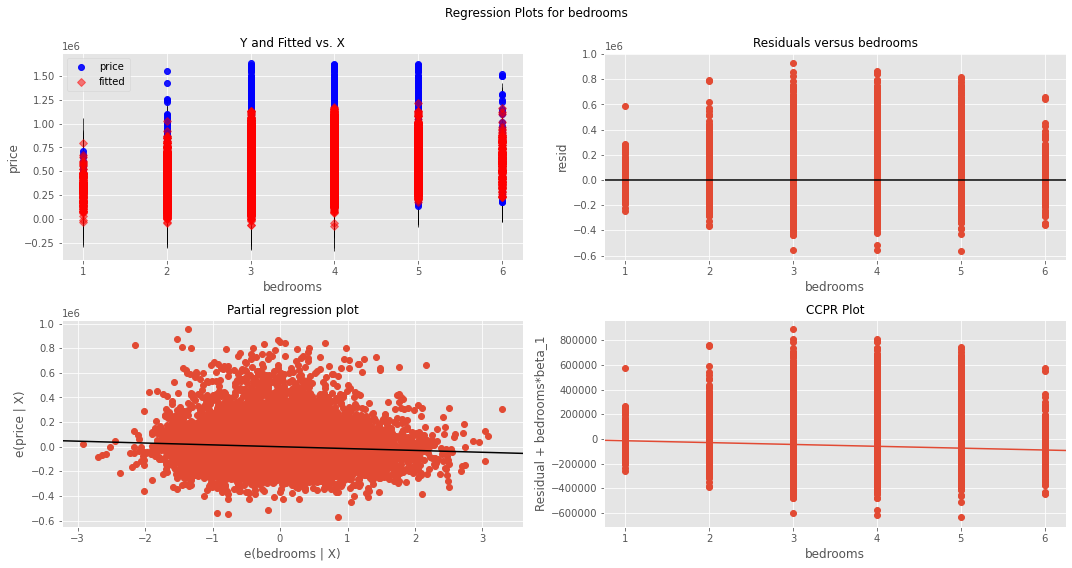

In [63]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2, 'bedrooms', fig=fig)
plt.show()

## Linearity Assumptions

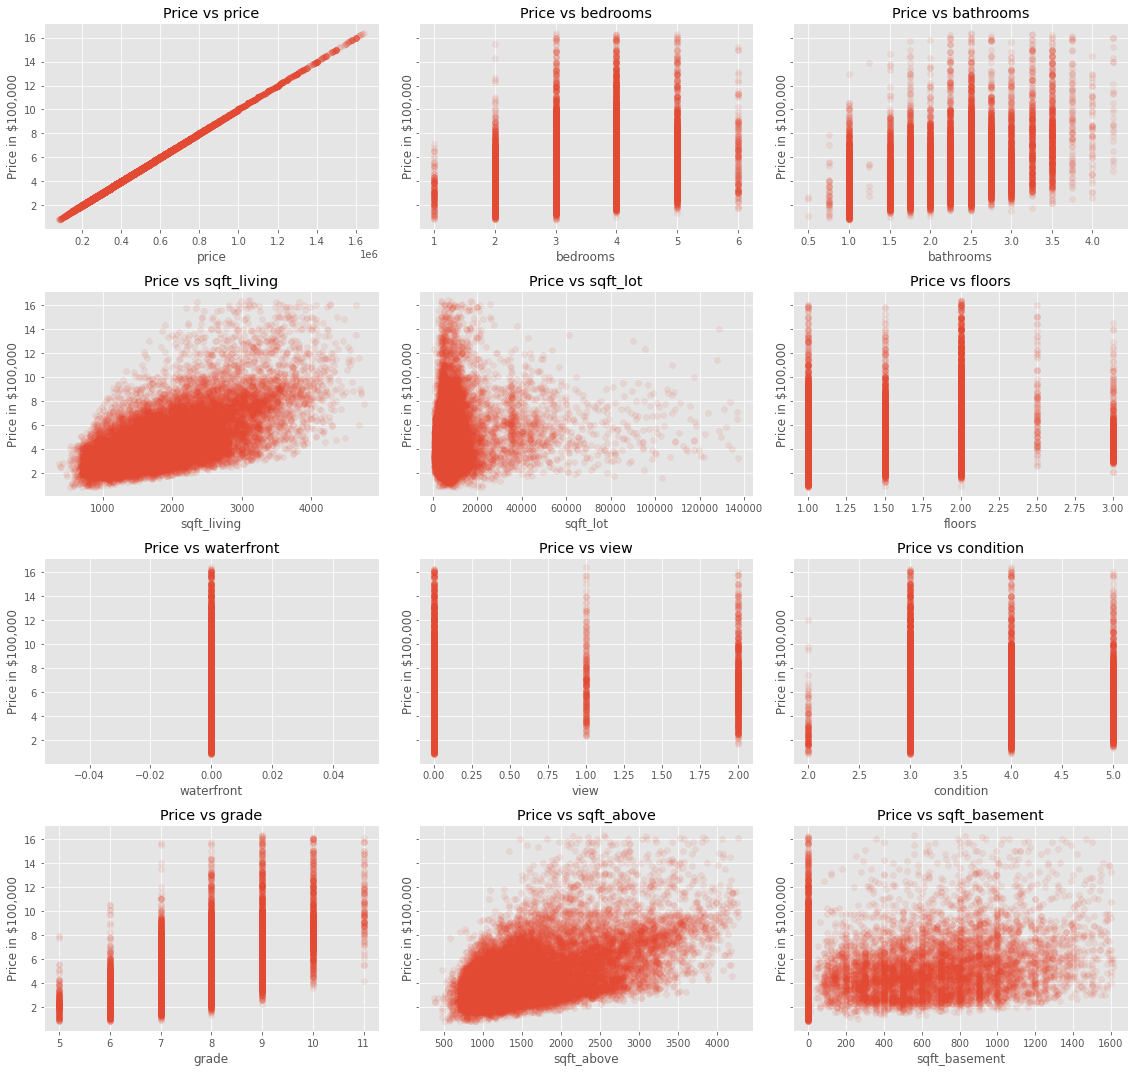

In [61]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price in $100,000')

fig.tight_layout()

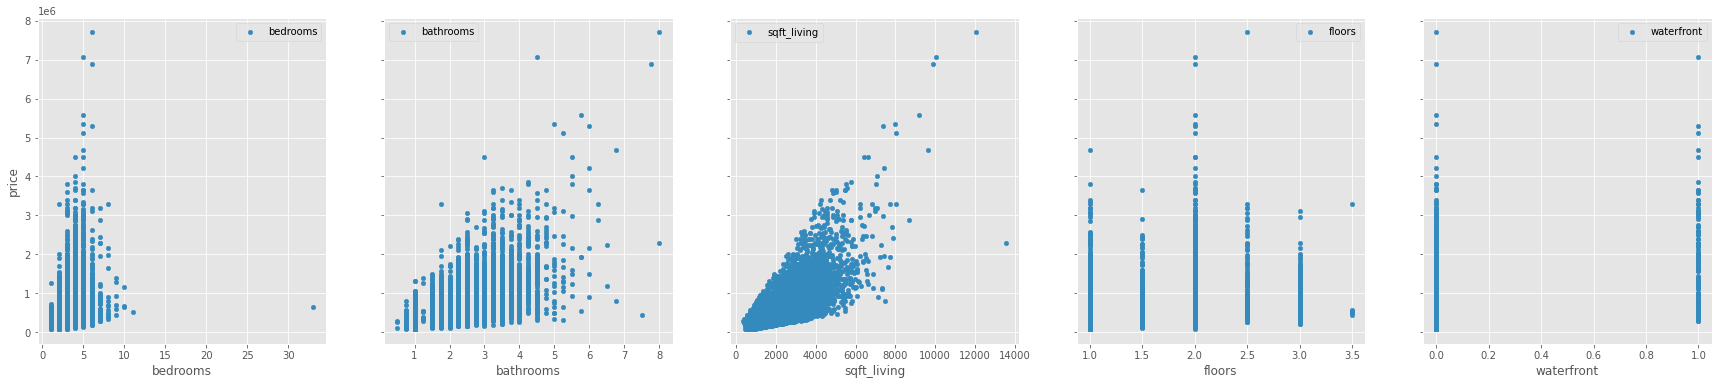

In [49]:
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(30, 6))
for idx, channel in enumerate(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront']):
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

# Final Model: Cross-Validation

In [ ]:
mse = make_scorer(mean_squared_error)

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)

## Normality Check (QQ Plot)

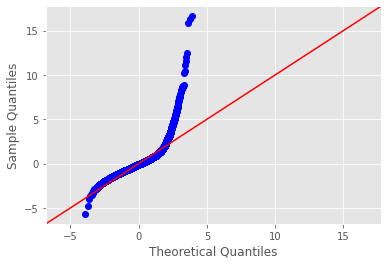

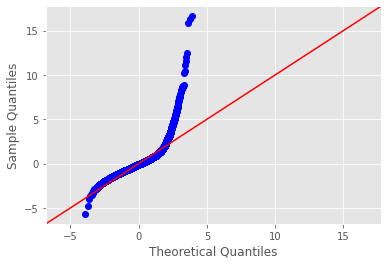

In [39]:
f = 'price~sqft_living'
f2 = 'price~sqft_living'
model = smf.ols(formula=f, data=df).fit()
model2 = smf.ols(formula=f2, data=df).fit()

resid1 = model.resid
resid2 = model2.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)

## Normality Check(JB Test)

In [40]:
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
list(zip(name, test))

[('Jarque-Bera', 535834.1592049851),
 ('Prob', 0.0),
 ('Skew', 2.825489391280093),
 ('Kurtosis', 27.006384771306518)]